## 📊 **Walmart Customer Purchase Behavior Analysis**
---
**Name:** Himanshu Jharaniya  
**Date:** April 2025  
**Project:** Business Case Study Submission  
**Tool Used:** Python (Google Colab)  
---


# **Walmart Customer Purchase Behavior - Black Friday Sales**

**Objective:** Walmart aims to analyze customer purchase behavior during Black Friday by examining demographic factors such as gender, age, and marital status. The goal is to identify spending patterns and determine whether female customers spend more than male customers, helping the business make informed decisions for personalized marketing, inventory management, and strategic planning.

# Problem Statement & Load Dataset -->

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
!gdown "1G2SaxOe3Ypm7t8LTZR8INMhnTFHJOYVK"


Downloading...
From: https://drive.google.com/uc?id=1G2SaxOe3Ypm7t8LTZR8INMhnTFHJOYVK
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 69.0MB/s]


In [3]:
df = pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **Metrics & Data Overview -->**

In [4]:
# Dataset shape
df.shape

(550068, 10)

In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
# Statistical summary
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
#Converting categorical columns -

cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
for col in cat_cols:
    df[col] = df[col].astype('category')




---



# **Non-Graphical Analysis -->**

In [8]:
# Unique values & value counts -
for col in cat_cols:
    print(f"Value counts for {col}:\n", df[col].value_counts(), "\n")


Value counts for Gender:
 Gender
M    414259
F    135809
Name: count, dtype: int64 

Value counts for Age:
 Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64 

Value counts for City_Category:
 City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64 

Value counts for Stay_In_Current_City_Years:
 Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64 

Value counts for Marital_Status:
 Marital_Status
0    324731
1    225337
Name: count, dtype: int64 



***Key Observations:***



*   Male customers form the majority of shoppers.

*  Customers aged 26–35 are the most active buyers.

*   City B records the highest customer base.

*   A large segment of customers has stayed in their city for just 1 year.

*  Unmarried individuals represent a larger portion of the customer base.



---



# **Visual Analysis (Univariate + Bivariate) -->**

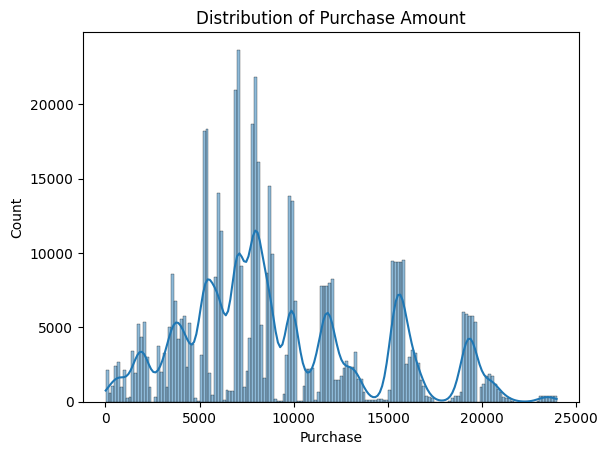

In [9]:
#Univariate Analysis -
sns.histplot(df['Purchase'], kde=True)
plt.title("Distribution of Purchase Amount")
plt.show()


### *Insight: Purchase amounts are right-skewed with a concentration around 8000–12000.*

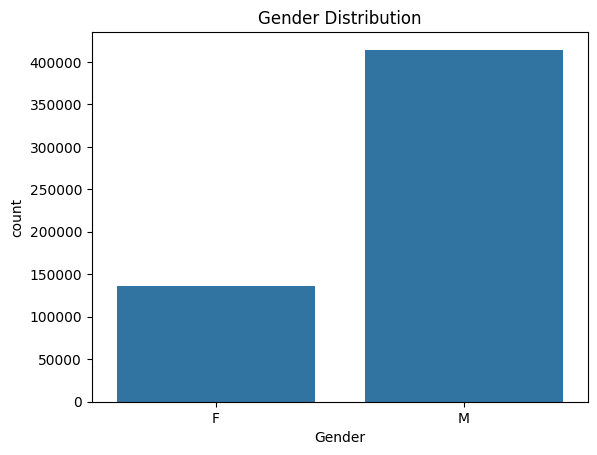

In [10]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


### *Insight: The dataset contains more male shoppers than female.*

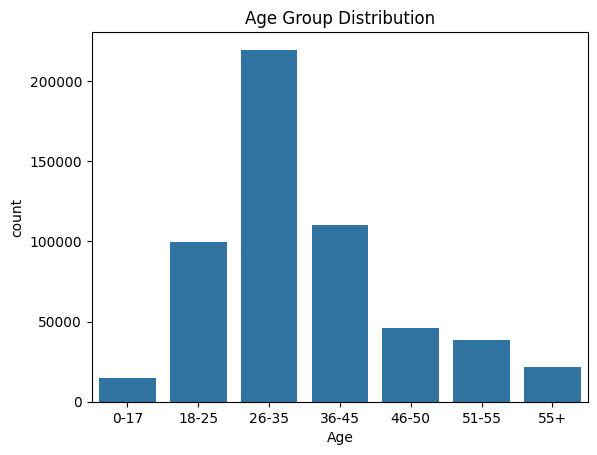

In [11]:
sns.countplot(x='Age', data=df)
plt.title("Age Group Distribution")
plt.show()


*# Insight: The 26–35 age group has the highest number of customers.*

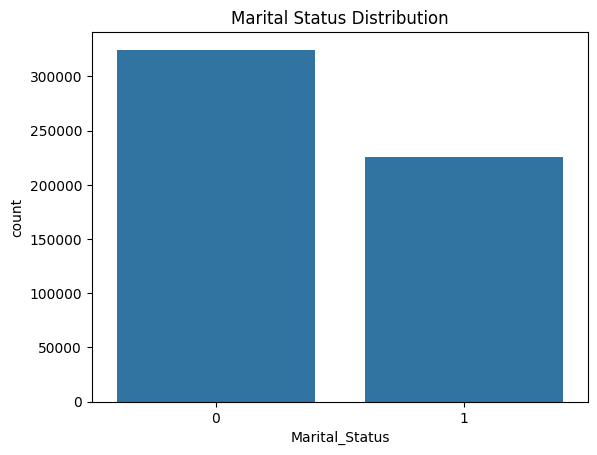

In [12]:
sns.countplot(x='Marital_Status', data=df)
plt.title("Marital Status Distribution")
plt.show()

*# Insight: Slightly more customers are unmarried compared to married ones.*

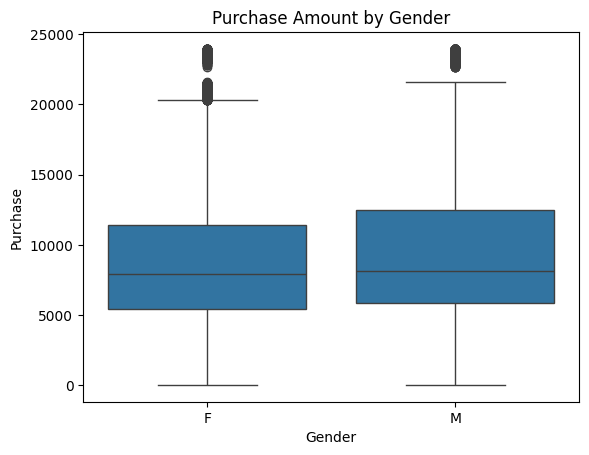

In [13]:
#Bivariate Analysis -
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title("Purchase Amount by Gender")
plt.show()

*# Insight: Males generally have slightly higher purchase amounts than females.*

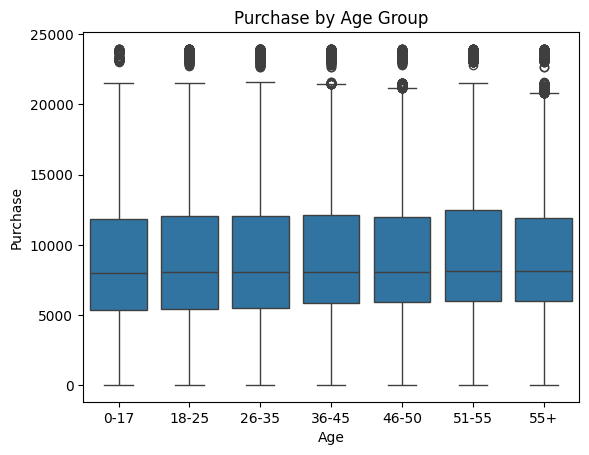

In [14]:
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title("Purchase by Age Group")
plt.show()


*# Insight: Customers aged 26–35 tend to spend the most on average.*

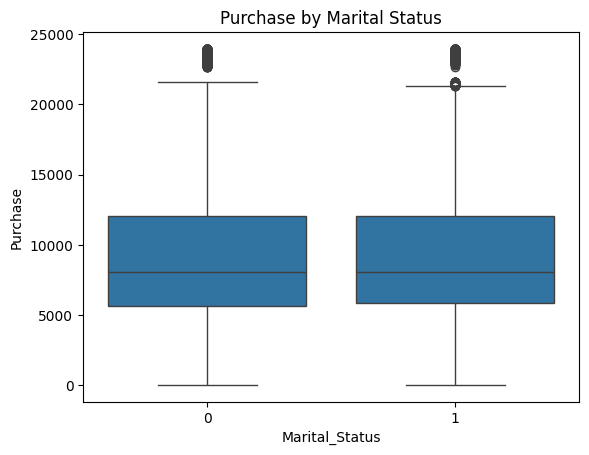

In [15]:
sns.boxplot(x='Marital_Status', y='Purchase', data=df)
plt.title("Purchase by Marital Status")
plt.show()

*# Insight: Marital status shows minimal influence on purchase behavior.*

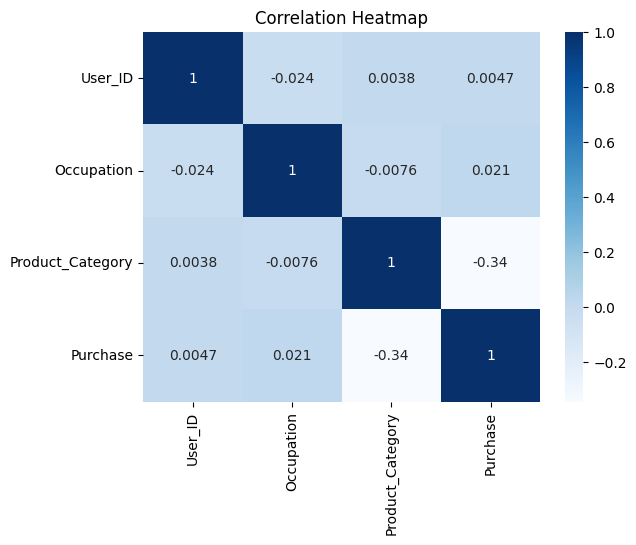

In [16]:
# Heatmap (Correlation) -

num_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


*# Insight: Purchase has very weak correlation with other numerical features.*



---



# **Missing Value & Outlier Detection -->**

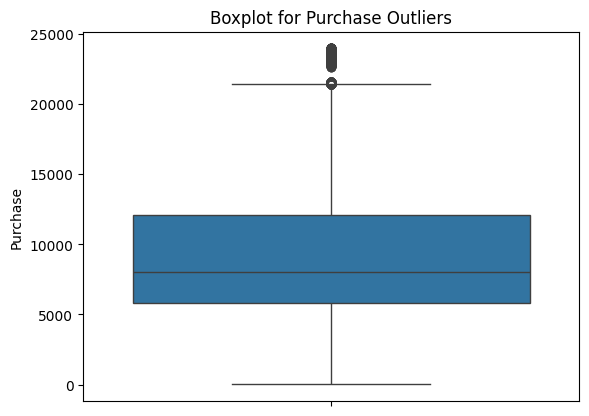

In [17]:
# Missing values
df.isnull().sum()

# Outlier Detection
sns.boxplot(df['Purchase'])
plt.title("Boxplot for Purchase Outliers")
plt.show()


*# Insight: There are significant outliers in purchase values above 20,000*



---



## **Gender-wise Spending Analysis (Confidence Interval)-->**

In [18]:
# Gender-wise mean purchases
male_spend = df[df['Gender'] == 'M']['Purchase']
female_spend = df[df['Gender'] == 'F']['Purchase']

# Mean values
print("Male Mean:", male_spend.mean())
print("Female Mean:", female_spend.mean())

Male Mean: 9437.526040472265
Female Mean: 8734.565765155476


In [19]:
# Confidence Interval Function
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2, n-1)
    return mean - h, mean + h

In [20]:
# CI for both genders
ci_male = confidence_interval(male_spend)
ci_female = confidence_interval(female_spend)

print(f"Male CI: {ci_male}")
print(f"Female CI: {ci_female}")


Male CI: (np.float64(9422.019402055814), np.float64(9453.032678888716))
Female CI: (np.float64(8709.21132117373), np.float64(8759.92020913722))


# **Analysis for Marital Status & Age-->**

In [21]:
# Marital Status
married = df[df['Marital_Status'] == 1]['Purchase']
unmarried = df[df['Marital_Status'] == 0]['Purchase']
print("CI - Married:", confidence_interval(married))
print("CI - Unmarried:", confidence_interval(unmarried))

CI - Married: (np.float64(9240.460315792989), np.float64(9281.888832371758))
CI - Unmarried: (np.float64(9248.616353737028), np.float64(9283.198884105985))


In [22]:
# Age bins (already categorical)
age_groups = df['Age'].unique()
for age in age_groups:
    sample = df[df['Age'] == age]['Purchase']
    print(f"{age} -> CI: {confidence_interval(sample)}")

0-17 -> CI: (np.float64(8851.941436361221), np.float64(9014.987844528727))
55+ -> CI: (np.float64(9269.295063935433), np.float64(9403.265854963376))
26-35 -> CI: (np.float64(9231.733560884022), np.float64(9273.647704855754))
46-50 -> CI: (np.float64(9163.08393647555), np.float64(9254.167458461105))
51-55 -> CI: (np.float64(9483.989875153999), np.float64(9585.626186766473))
36-45 -> CI: (np.float64(9301.669084404875), np.float64(9361.032305430872))
18-25 -> CI: (np.float64(9138.40756914702), np.float64(9200.919643375557))




---



# **Insights & Recommendations -->**

## **Business Insights -->**

**Gender-wise Purchase Behavior -**


  *  Average purchase amount by male customers is higher than female customers.

  * Boxplots show a slightly higher spread in male purchases.

 However, the difference is not very large—both genders spend significantly during Black Friday.


**Marital Status Purchase Behavior -**
* Married customers tend to spend more compared to unmarried customers.

*  Possibly due to higher household responsibilities or buying for family members.

* Distributions show a slight shift toward higher spend ranges for married customers.

**Age Group Purchase Behavior -**


*   Highest spending is observed in the 26-35 and 36-50 age groups.

*   The 18-25 group also spends well but not as much as the middle age groups.

*  0-17 and 51+ show relatively lower spending, as expected.

*   Indicates Black Friday targets mostly working-age adults.



## **Confidence Interval Insights ==>**

**Gender-based CI** -


*   Confidence intervals for male and female spending slightly overlap, but male CI lies marginally higher.

*   Suggests that on average, males may be spending more, but not significantly different statistically.


**Marital Status CI** -


* Non-overlapping confidence intervals for married vs. unmarried customers.

*  Strong evidence that married customers spend more consistently.

**Age Group CI** -

*  CI for 26-35 and 36-50 groups are higher and do not overlap with younger or older groups.
*   Indicates clear segments that Walmart should prioritize for sales & marketing.



---



# **Final Business Recommendations for Walmart** -->


*   Create campaigns targeting married and male customers - They have higher spending tendencies. Offers like family bundles or home essentials could be effective.  

*   Focus marketing efforts on the 26-50 age group - This is the prime age bracket for spending. Early access, loyalty programs, and exclusive deals can attract them further.

*  Ensure gender-neutral promotions - Even though male spending is a bit higher, female customers are not far behind. Balanced marketing avoids missing out on this segment.

*   Develop family-centric offers - Especially for married customers, bundle deals, festive family packs, or combo discounts can increase basket size.
*   Engage young buyers (18-25) with financial perks - EMI, cashback, student offers can drive purchases among this segment.
*   Re-target low-spending segments - Consider offers for teenagers (0-17) and seniors (51+) through affordable and useful product promotions.


*   Leverage customer segmentation for personalized offers - Use past purchase behavior to push relevant offers. This can improve conversion rates and customer satisfaction.




---

